In [1]:
!pip install git+https://github.com/serpapi/google-search-results-python.git


  Cloning https://github.com/serpapi/google-search-results-python.git to /tmp/pip-req-build-j1m159q3
  Running command git clone --filter=blob:none --quiet https://github.com/serpapi/google-search-results-python.git /tmp/pip-req-build-j1m159q3
  Resolved https://github.com/serpapi/google-search-results-python.git to commit 264be6d62fda3e38114b7df5dfc1d3f480e58507
  Preparing metadata (setup.py) ... done
  Created wheel for google_search_results: filename=google_search_results-2.4.2-py3-none-any.whl size=34335 sha256=c5aac8f02c9aba69fef78fe5ae21388c1e0947deb7495c8050795dc94557dc16
  Stored in directory: /tmp/pip-ephem-wheel-cache-5c7e727e/wheels/9a/08/98/d012fd663f2f8190b0bde004bd6f4a2666acf57da2b5ad9e70
Successfully built google_search_results


In [2]:
from serpapi import GoogleSearch

print("✅ SerpAPI is now working!")


✅ SerpAPI is now working!


In [3]:

!pip install beautifulsoup4

In [4]:

!pip install transformers google-search-results beautifulsoup4 requests

Saving doggy.jpg to doggy.jpg


Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]


 Image caption extracted: "a golden retrieve puppy lying down"

 Visually Similar Images Found:


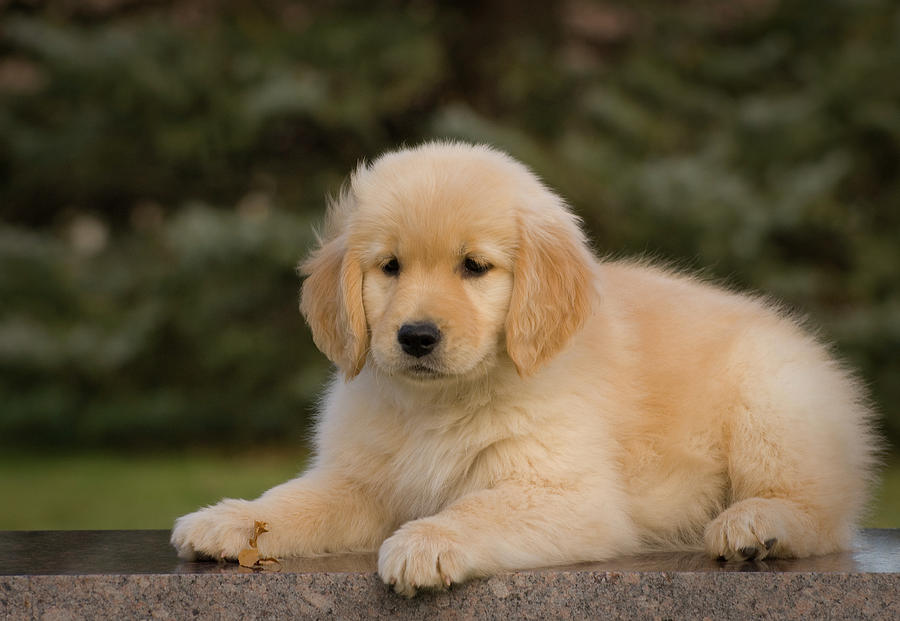

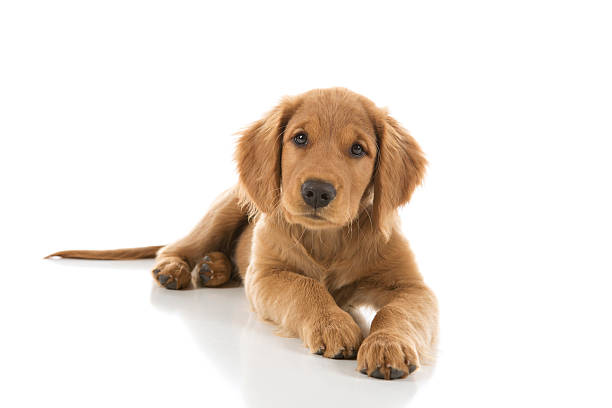

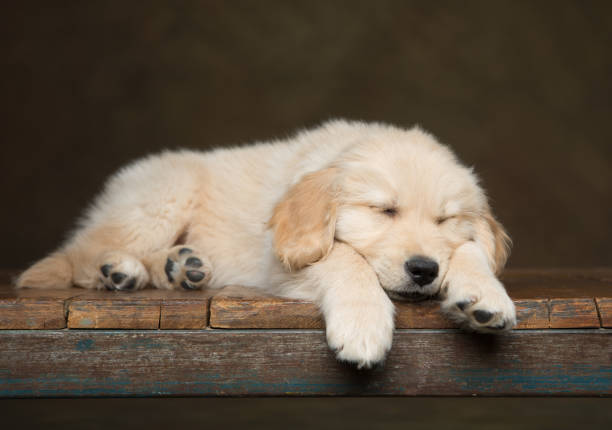

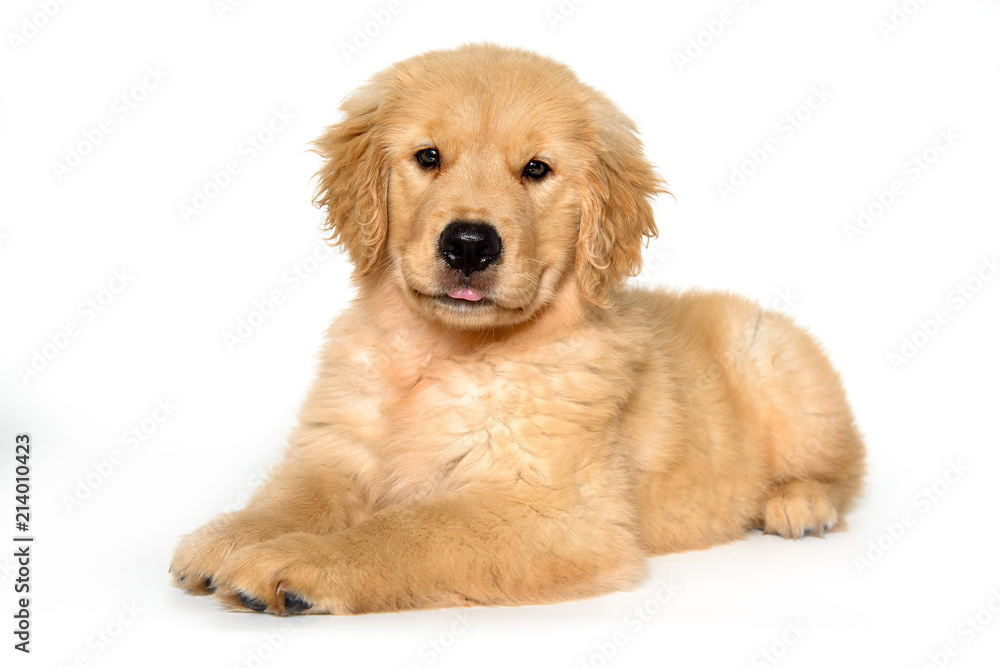

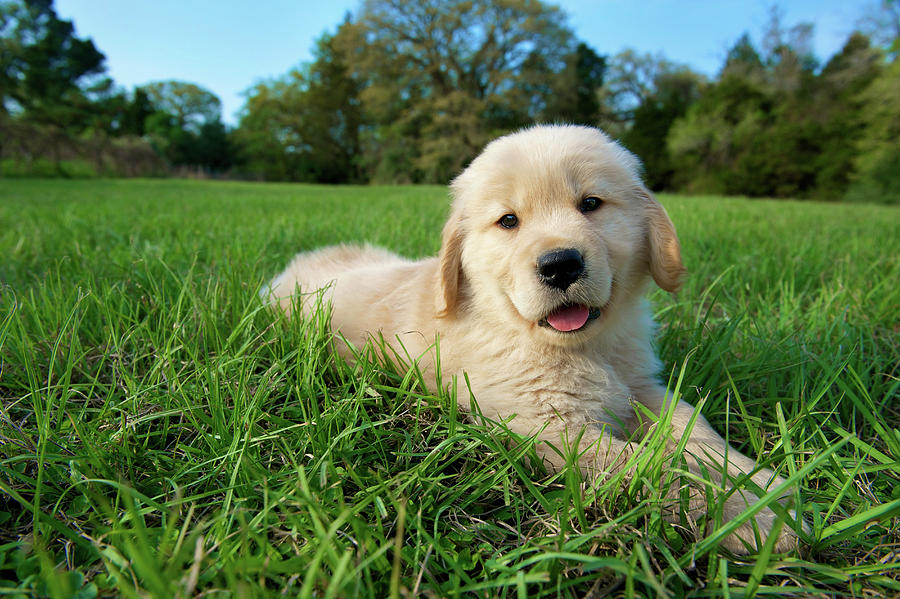

In [5]:

from google.colab import files
uploaded = files.upload()

from PIL import Image
import os

uploaded_filename = list(uploaded.keys())[0]
image = Image.open(uploaded_filename).convert("RGB")

from transformers import BlipProcessor, BlipForConditionalGeneration

processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

inputs = processor(images=image, return_tensors="pt")
output = model.generate(**inputs)
caption = processor.decode(output[0], skip_special_tokens=True)

print(f"\n Image caption extracted: \"{caption}\"")

from serpapi import GoogleSearch
import requests
from io import BytesIO
import IPython.display as display

params = {
    "engine": "google",
    "q": caption,  # Auto-generated caption
    "tbm": "isch",  # image search
    "api_key": "f5690439d2ec477a1329ff0fc525bf9fbfd7ee9d150b2f13bab3facaa7a1e838"
}

search = GoogleSearch(params)
results = search.get_dict()
image_results = results.get("images_results", [])

print("\n Visually Similar Images Found:")
for result in image_results[:5]:
    img_url = result.get("original")
    if img_url:
        response = requests.get(img_url)
        similar_img = Image.open(BytesIO(response.content))
        display.display(similar_img)


In [ ]:
from google.colab import files
import csv
import re
import requests
from bs4 import BeautifulSoup
from PIL import Image
from transformers import BlipProcessor, BlipForConditionalGeneration
from serpapi import GoogleSearch

uploaded = files.upload()
uploaded_filename = list(uploaded.keys())[0]
image = Image.open(uploaded_filename).convert("RGB")

processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")
inputs = processor(images=image, return_tensors="pt")
output = model.generate(**inputs)
caption = processor.decode(output[0], skip_special_tokens=True)
print(f"\n Image caption extracted: \"{caption}\"")

params = {
    "engine": "google",
    "q": caption,
    "tbm": "isch",
    "api_key": "f5690439d2ec477a1329ff0fc525bf9fbfd7ee9d150b2f13bab3facaa7a1e838"
}

search = GoogleSearch(params)
results = search.get_dict()
image_results = results.get("images_results", [])

j = int(input("Enter how many website links you want to fetch: "))
data_to_save = []

print("\n Website links and prices:")
for i, result in enumerate(image_results[:j], 1):
    title = result.get("title", "No Title")
    link = result.get("link")
    print(f"\n{i}. {title}\n{link}")

    price = "Not Found"
    try:
        headers = {'User-Agent': 'Mozilla/5.0'}
        response = requests.get(link, headers=headers, timeout=10)
        soup = BeautifulSoup(response.text, 'html.parser')
        text = soup.get_text()

        price_match = re.search(r'(\$|₹|Rs\.?)\s?\d{1,3}(?:[,\d]{3})*(?:\.\d{1,2})?', text)
        if price_match:
            price = price_match.group(0)
    except Exception as e:
        print(f"    Error fetching price: {e}")

    print(f"    Price: {price}")
    data_to_save.append([title, link, price])

csv_filename = "image_search_with_prices.csv"
with open(csv_filename, mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(["Title", "Website Link", "Price"])
    writer.writerows(data_to_save)

print(f"\n CSV file saved as '{csv_filename}'")
files.download(csv_filename)


Saving Weblist_3_1200x.webp to Weblist_3_1200x (1).webp

 Image caption extracted: "thermo stainless bottle with stainless lid"
Enter how many website links you want to fetch: 35

 Website links and prices:

1. Thermos 40 oz. Icon Vacuum Insulated Stainless Steel Water Bottle - Matte Stainless Steel
https://www.amazon.com/THERMOS-Stainless-Steel-Water-Bottle/dp/B0C2S6K9K6
    Price: Not Found

2. Thermos 16oz Stainless Steel Direct Drink Bottle Black
https://thermos.com/products/stainless-steel-direct-drink-bottle-16oz
    Price: $0.00

3. 40oz STAINLESS KING™ BEVERAGE BOTTLE
https://thermos.com/products/stainless-king-beverage-bottle-40oz
    Price: $0.00

4. Thermos 32 oz. Icon Insulated Stainless Steel Screw Top Water Bottle Granite
https://www.amazon.com/THERMOS-Stainless-Steel-Bottle-Granite/dp/B0CFMSR5XN
    Price: Not Found

5. Hot Cold Thermos Bottle Stainless Steel Insulate Vacuum Cup Water Bottle |  eBay
https://www.ebay.com/itm/404613443808
    Price: $84.67

6. Icon Series 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip install tldextract


In [ ]:
from google.colab import files
import csv, re, requests, tldextract
from bs4 import BeautifulSoup
from PIL import Image
from transformers import BlipProcessor, BlipForConditionalGeneration
from serpapi import GoogleSearch

uploaded = files.upload()
filename = list(uploaded.keys())[0]
image = Image.open(filename).convert("RGB")

processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")
inputs = processor(images=image, return_tensors="pt")
caption = processor.decode(model.generate(**inputs)[0], skip_special_tokens=True)
print(f"\n🧠 Caption: \"{caption}\"\n")

# --- Step 2: Google Image Search ---
serpapi_api_key = "YOUR_SERPAPI_KEY"
params = {
    "engine": "google",
    "q": caption,
    "tbm": "isch",
    "api_key": "f5690439d2ec477a1329ff0fc525bf9fbfd7ee9d150b2f13bab3facaa7a1e838"
}
search = GoogleSearch(params)
image_results = search.get_dict().get("images_results", [])

# --- Step 3: Desired Product Count ---
target_count = int(input("Enter number of product links to fetch: "))
exclude_domains = {"amazon.com", "flipkart.com", "ebay.com", "ebuy.com","walmart.com"}
headers = {'User-Agent': 'Mozilla/5.0'}
data = []
fetched = 0
i = 0

# --- Step 4: Scrape Until Target is Reached ---
while fetched < target_count and i < len(image_results):
    result = image_results[i]
    link = result.get("link", "")
    title = result.get("title", "No Title")
    domain = tldextract.extract(link).registered_domain.lower()
    i += 1

    if domain in exclude_domains:
        print(f"➡️ Skipping excluded site: {domain}")
        continue

    print(f"\n{fetched+1}. {title}\n{link}")

    price = "Not Found"
    rating = "N/A"
    reviews = "N/A"
    stock = "Unknown"
    delivery = "Unknown"
    description = ""

    try:
        resp = requests.get(link, headers=headers, timeout=10)
        soup = BeautifulSoup(resp.text, "html.parser")
        text = soup.get_text(separator=" ").strip()

        pm = re.search(r'(\$|₹|Rs\.?)\s?\d{1,3}(?:[,\d]{3})*(?:\.\d{1,2})?', text)
        if pm: price = pm.group(0)

        rm = re.search(r'(\d\.\d)\s?out of\s?5', text)
        if rm: rating = rm.group(1) + "/5"

        revm = re.search(r'([\d,]+)\s+(?:reviews|ratings)', text)
        if revm: reviews = revm.group(1)

        if re.search(r'\b(in stock|available now)\b', text, re.IGNORECASE):
            stock = "In Stock"
        elif re.search(r'\b(out of stock|unavailable)\b', text, re.IGNORECASE):
            stock = "Out of Stock"

        dm = re.search(r'(deliver(?:y|ed) by [A-Za-z0-9,\s]+)', text, re.IGNORECASE)
        if not dm:
            dm = re.search(r'(ships? by [A-Za-z0-9,\s]+)', text, re.IGNORECASE)
        if dm: delivery = dm.group(1)

        meta = soup.find("meta", attrs={"name": "description"})
        description = meta["content"].strip() if meta and meta.get("content") else soup.find("p", "").get_text()[:300] if soup.find("p") else ""

    except Exception as e:
        print(f"⚠️ Error scraping {link}: {e}")

    print(f"  Price: {price} | Stock: {stock} | Delivery: {delivery}")
    data.append([title, link, price, rating, reviews, stock, delivery, domain, description])
    fetched += 1

# --- Step 5: Save to CSV ---
csv_name = "products_detailed.csv"
with open(csv_name, "w", newline="", encoding="utf-8") as f:
    writer = csv.writer(f)
    writer.writerow(["Title", "Link", "Price", "Rating", "Reviews", "Stock Status", "Delivery Info", "Retailer", "Description"])
    writer.writerows(data)

print(f"\n✅ CSV saved as {csv_name}")
files.download(csv_name)


Saving Weblist_3_1200x.webp to Weblist_3_1200x (11).webp

🧠 Caption: "thermo stainless bottle with stainless lid"

Enter number of product links to fetch: 30


/tmp/ipython-input-5-1705156126.py:42: DeprecationWarning: The 'registered_domain' property is deprecated and will be removed in the next major version. Use 'top_domain_under_public_suffix' instead, which has the same behavior but a more accurate name.
  domain = tldextract.extract(link).registered_domain.lower()


➡️ Skipping excluded site: amazon.com

1. Thermos 16oz Stainless Steel Direct Drink Bottle Black
https://thermos.com/products/stainless-steel-direct-drink-bottle-16oz
  Price: $0.00 | Stock: Unknown | Delivery: Unknown

2. 40oz STAINLESS KING™ BEVERAGE BOTTLE
https://thermos.com/products/stainless-king-beverage-bottle-40oz
  Price: $0.00 | Stock: Unknown | Delivery: Unknown
➡️ Skipping excluded site: amazon.com
➡️ Skipping excluded site: ebay.com

3. Icon Series by Thermos Stainless Steel Water Bottle with Spout 24 Ounce, Graphite
https://thermos.com/products/icon-water-bottle-with-spout-24oz
  Price: $0.00 | Stock: Unknown | Delivery: Unknown
➡️ Skipping excluded site: amazon.com

4. Thermos 40 oz. Icon Vacuum Insulated Stainless Steel Water Bottle - Granite
https://www.target.com/p/thermos-40oz-stainless-steel-wide-mouth-hydration-bottle/-/A-88115554
  Price: Not Found | Stock: Unknown | Delivery: Unknown

5. Insulated Stainless Steel Reusable Drink Bottle with SS Lid & Handle
https:

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
import csv, re, requests, time
from bs4 import BeautifulSoup
from PIL import Image
from transformers import BlipProcessor, BlipForConditionalGeneration

# Upload the image
uploaded = files.upload()
uploaded_filename = list(uploaded.keys())[0]
image = Image.open(uploaded_filename).convert("RGB")

# Generate a caption using BLIP
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")
inputs = processor(images=image, return_tensors="pt")
output = model.generate(**inputs)
caption = processor.decode(output[0], skip_special_tokens=True)
print(f"\n🖼️ Image caption extracted: \"{caption}\"")

# DuckDuckGo Web Search (not image search)
def duckduckgo_web_search(query, max_results=10):
    print(f"\n🔍 Performing DuckDuckGo web search for: \"{query}\"")
    headers = {'User-Agent': 'Mozilla/5.0'}
    params = {'q': query}
    results = []

    try:
        res = requests.post("https://html.duckduckgo.com/html/", data=params, headers=headers, timeout=10)
        soup = BeautifulSoup(res.text, 'html.parser')
        for a in soup.select('a.result__a'):
            title = a.text.strip()
            href = a['href']
            if href.startswith('/l/?kh='):
                match = re.search(r'u=(.*?)&', href)
                if match:
                    href = requests.utils.unquote(match.group(1))
            if not href.endswith(('.jpg', '.jpeg', '.png', '.gif')):
                results.append({'title': title, 'link': href})
            if len(results) >= max_results:
                break
    except Exception as e:
        print(f"❌ Error during web search: {e}")

    return results

# Filter unsafe or blocked domains
def is_valid_link(link):
    if not link or not link.startswith("http"):
        return False
    blacklist = [
        "pinterest", "facebook", "duckduckgo.com", "tumblr", "flickr",
        "amazon.", "flipkart.", "ebay.", "aliexpress.", "walmart.",
        "snapdeal.", "myntra.", "shopify.", "bestbuy.", "target.com", "ajio."
    ]
    return not any(domain in link.lower() for domain in blacklist)

# Run the web search
results = duckduckgo_web_search(caption, max_results=20)
j = int(input("🔢 Enter how many valid product pages you want to fetch: "))

data_to_save = []
headers = {'User-Agent': 'Mozilla/5.0'}
count = 0

print("\n🛒 Extracting product data from valid pages...")
for i, result in enumerate(results):
    if count >= j:
        break

    title = result.get("title", "No Title")
    link = result.get("link", "")
    if not is_valid_link(link):
        continue

    print(f"\n{count + 1}. {title}\n🔗 {link}")
    time.sleep(1)  # Be respectful to servers

    price, rating, reviews, description = "Not Found", "N/A", "N/A", ""

    try:
        response = requests.get(link, headers=headers, timeout=10)
        soup = BeautifulSoup(response.text, 'html.parser')
        text = soup.get_text()

        # Price detection
        price_match = re.search(r'(\$|₹|Rs\.?)\s?\d{1,3}(?:[,\d]{3})*(?:\.\d{1,2})?', text)
        if price_match:
            price = price_match.group(0)

        # Rating detection
        rating_match = re.search(r'(\d\.\d)\s?out of\s?5', text)
        if rating_match:
            rating = rating_match.group(1) + "/5"

        # Review count
        review_match = re.search(r'([\d,]+)\s+(?:reviews|ratings)', text)
        if review_match:
            reviews = review_match.group(1)

        # Description
        meta_desc = soup.find("meta", attrs={"name": "description"})
        if meta_desc and meta_desc.get("content"):
            description = meta_desc["content"].strip()
        else:
            first_p = soup.find("p")
            if first_p:
                description = first_p.get_text().strip()[:300]

    except Exception as e:
        print(f"   ⚠️ Error fetching product data: {e}")

    print(f"   💰 Price: {price}\n   ⭐ Rating: {rating}\n   🗣️ Reviews: {reviews}")
    data_to_save.append([title, link, price, rating, reviews, description])
    count += 1

# Save results to CSV
csv_filename = "image_search_products_duckduckgo_filtered.csv"
with open(csv_filename, mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(["Title", "Website Link", "Price", "Rating", "Reviews Count", "Product Description"])
    writer.writerows(data_to_save)

print(f"\n✅ CSV file saved as '{csv_filename}'")
files.download(csv_filename)


Saving Weblist_3_1200x.webp to Weblist_3_1200x (3).webp

🖼️ Image caption extracted: "thermo stainless bottle with stainless lid"

🔍 Performing DuckDuckGo web search for: "thermo stainless bottle with stainless lid"
🔢 Enter how many valid product pages you want to fetch: 10

🛒 Extracting product data from valid pages...

1. 24oz Stainless Steel Insulated Drink Bottle - Thermos Brand
🔗 https://thermos.com/products/stainless-king-drink-bottle-24oz
   💰 Price: $0.00
   ⭐ Rating: N/A
   🗣️ Reviews: N/A

2. Stainless Steel Thermo Bottle with Drinking Lid | waterdrop®
🔗 https://www.waterdrop.com/products/all-purpose-thermo-bottle-straw-lid
   💰 Price: $42.00
   ⭐ Rating: 5.0/5
   🗣️ Reviews: 5

3. ThermoFlask 64 oz. Double Wall Insulated Stainless Steel Bottle with ...
🔗 https://www.costco.com/thermoflask-64-oz.-double-wall-insulated-stainless-steel-bottle-with-straw-lid.product.4000348873.html
   ⚠️ Error fetching product data: HTTPSConnectionPool(host='www.costco.com', port=443): Read time

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 58.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 106.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 78.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 63.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 81.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [ ]:
from google.colab import files
import torch, os, re, csv, requests, time, cv2
from PIL import Image
from ultralytics import YOLO
from bs4 import BeautifulSoup
from collections import defaultdict

# Step 1: Upload video
uploaded = files.upload()
video_path = list(uploaded.keys())[0]

# Step 2: Load YOLOv8 model
model = YOLO("yolov8n.pt")  # or yolov8s.pt for better accuracy

# Step 3: Extract frames and detect objects
print("\n🎯 Extracting objects from video...")
cap = cv2.VideoCapture(video_path)
fps = int(cap.get(cv2.CAP_PROP_FPS))
frame_interval = fps * 2  # every 2 seconds
frame_count = 0
object_images = defaultdict(list)
max_objects_per_class = 10

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    if frame_count % frame_interval == 0:
        results = model(frame)[0]
        for box in results.boxes:
            cls = int(box.cls)
            label = model.names[cls]
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            crop = frame[y1:y2, x1:x2]
            if len(object_images[label]) < max_objects_per_class:
                object_images[label].append(Image.fromarray(cv2.cvtColor(crop, cv2.COLOR_BGR2RGB)))
    frame_count += 1

cap.release()
print(f"✅ Objects detected: {list(object_images.keys())}")

# Step 4: Web Search per object (DuckDuckGo)
def duckduckgo_search(query, max_results=10):
    headers = {'User-Agent': 'Mozilla/5.0'}
    params = {'q': query}
    results = []
    try:
        res = requests.post("https://html.duckduckgo.com/html/", data=params, headers=headers, timeout=10)
        soup = BeautifulSoup(res.text, 'html.parser')
        for a in soup.select('a.result__a'):
            title = a.text.strip()
            href = a['href']
            if href.startswith('/l/?kh='):
                match = re.search(r'u=(.*?)&', href)
                if match:
                    href = requests.utils.unquote(match.group(1))
            if not href.endswith(('.jpg', '.jpeg', '.png', '.gif')):
                results.append({'title': title, 'link': href})
            if len(results) >= max_results:
                break
    except Exception as e:
        print(f"❌ Search error for '{query}': {e}")
    return results

def is_valid_link(link):
    if not link or not link.startswith("http"):
        return False
    whitelist = [
        "amazon.", "flipkart.", "ebay.", "aliexpress.", "walmart.",
        "snapdeal.", "myntra.", "shopify.", "bestbuy.", "target.com", "ajio."
    ]
    return any(domain in link.lower() for domain in whitelist)


# Step 5: Scrape details from product page
def extract_product_data(link):
    headers = {'User-Agent': 'Mozilla/5.0'}
    price, rating, reviews, description = "Not Found", "N/A", "N/A", ""
    try:
        response = requests.get(link, headers=headers, timeout=10)
        soup = BeautifulSoup(response.text, 'html.parser')
        text = soup.get_text()

        price_match = re.search(r'(\$|₹|Rs\.?)\s?\d{1,3}(?:[,\d]{3})*(?:\.\d{1,2})?', text)
        if price_match:
            price = price_match.group(0)

        rating_match = re.search(r'(\d\.\d)\s?out of\s?5', text)
        if rating_match:
            rating = rating_match.group(1) + "/5"

        review_match = re.search(r'([\d,]+)\s+(?:reviews|ratings)', text)
        if review_match:
            reviews = review_match.group(1)

        meta_desc = soup.find("meta", attrs={"name": "description"})
        if meta_desc and meta_desc.get("content"):
            description = meta_desc["content"].strip()
        else:
            first_p = soup.find("p")
            if first_p:
                description = first_p.get_text().strip()[:300]

    except Exception as e:
        print(f"⚠️ Scrape error for {link}: {e}")
    return price, rating, reviews, description

# Step 6: Search and Scrape for each object type
data_to_save = []

for obj_name, images in object_images.items():
    print(f"\n🔍 Searching for: {obj_name}")
    search_results = duckduckgo_search(f"buy {obj_name} online", max_results=30)
    count = 0
    for result in search_results:
        if is_valid_link(result["link"]):
            print(f"\n🛒 {obj_name} → {result['title']}")
            print(f"🔗 {result['link']}")
            price, rating, reviews, desc = extract_product_data(result['link'])
            print(f"💰 Price: {price} | ⭐ Rating: {rating} | 🗣️ Reviews: {reviews}")
            data_to_save.append([obj_name, result['title'], result['link'], price, rating, reviews, desc])
            count += 1
        if count >= 10:
            break

# Step 7: Save CSV
csv_filename = "video_objects_scraped.csv"
with open(csv_filename, mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(["Object Type", "Title", "Website Link", "Price", "Rating", "Reviews Count", "Description"])
    writer.writerows(data_to_save)

print(f"\n✅ Saved all product details to '{csv_filename}'")
files.download(csv_filename)


Saving testvideo.mp4 to testvideo (1).mp4

🎯 Extracting objects from video...

0: 384x640 1 bottle, 1 tv, 3 laptops, 2 mouses, 1 keyboard, 1 cell phone, 8.9ms
Speed: 2.0ms preprocess, 8.9ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bottle, 1 tv, 2 laptops, 2 mouses, 1 keyboard, 1 cell phone, 8.5ms
Speed: 2.8ms preprocess, 8.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bottle, 1 tv, 3 laptops, 2 mouses, 1 keyboard, 1 cell phone, 8.4ms
Speed: 3.0ms preprocess, 8.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)
✅ Objects detected: ['laptop', 'mouse', 'cell phone', 'bottle', 'keyboard', 'tv']

🔍 Searching for: laptop

🛒 laptop → Laptops & Notebook Computers - Best Buy
🔗 https://www.bestbuy.com/site/computers-pcs/laptop-computers/abcat0502000.c?id%3Dabcat0502000
⚠️ Scrape error for https://www.bestbuy.com/site/computers-pcs/laptop-computers/abcat0502000.c?id%3Dabcat0502000: HTTPSConnectionPool(hos

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>